<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
             Divers of Churn
</div>

##  Goals: 
 - Find drivers of churn.
 - Use drivers to develop a machine learning model to classify customers as churn or not churn.
 - Summarize finding by providing recommendations on how to improve Telco customer loyalty.

### Imports

In [1]:
#data manipulations
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os
 
#stats
from scipy import stats

#my own files with my own functions
import acquire
import prepare
import explore

# train test split function and models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


## Acquire 
 - Get data from Codeup DS Database Server 
 - Each row represents a customer
 - Each columns represents a feature of a customer





## Prepare 
 - Remove SQL joiner columns
 - Checked for null values in the data
 - Remove blank spaces from columns
 - Split data into train, validate, and test.
 

## Data Dictionary
 - Gender is this
 - Senior citizen means that
 

In [2]:
# acquire, cleaning, and adding features to data
df = prepare.prep_telco(acquire.get_telco_data())

In [3]:
# splitting data into train, validate, and test
train, validate, test = prepare.split_data(df, 'churn')

train: 4225 (60.0% of 7043)
validate: 1409 (20.0% of 7043)
test: 1409 (20.0% of 7043)


### First Looks

In [4]:
train.head()

,gender,senior_citizen,partner,dependents,phone_service_type,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,total_add_on_count,tenure_years
customer_id,,,,,,,,,,,,,,
4083-BFNYK,Female,Yes,Yes,No,Multiple lines,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),3,3
5804-LEPIM,Female,Yes,No,No,Single line,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,0,0
4895-TMWIR,Male,Yes,Yes,No,Single line,No,19.95,214.75,Yes,Month-to-month,No internet service,Mailed check,No internet service,0
1342-JPNKI,Male,No,No,No,Multiple lines,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),1,0
3397-AVTKU,Male,No,No,No,Single line,Yes,60.00,2548.55,No,Two year,DSL,Electronic check,2,3


### Data summary

In [5]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,4225,2,Male,2116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senior_citizen,4225,2,No,3531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,4225,2,No,2160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,4225,2,No,2961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone_service_type,4225,3,Single line,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paperless_billing,4225,2,Yes,2507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_charges,4225.0,NaN,NaN,NaN,65.138947,30.336884,18.25,35.4,70.55,90.4,118.75
total_charges,4225.0,NaN,NaN,NaN,2305.884888,2282.408946,0.0,408.25,1389.35,3886.45,8672.45
churn,4225,2,No,3104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contract_type,4225,3,Month-to-month,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore

### How often do customers churn?

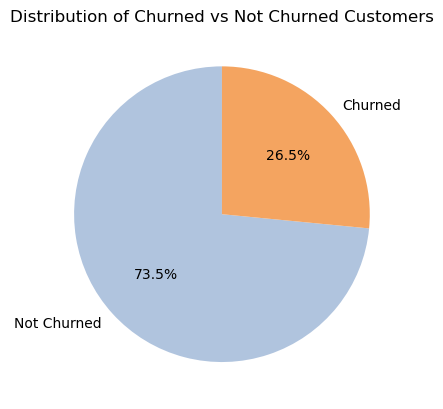

In [6]:
# distribution of our target variable
explore.visualize_churn_distribution(train)

> over a quarter of customers are churnning

### Are new customers more likely to churn?

 $H_0$: There is no relationship between tenure and whether or not someone has churned

 $H_a$: There is a relationship between tenure and whether or not someone has churned
 
 aplha = 0.05

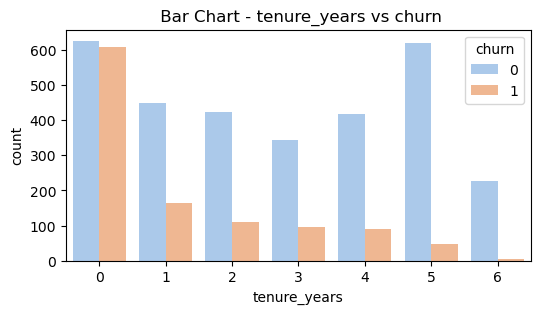

Contingency Table:
churn           0    1
tenure_years          
0             626  609
1             448  164
2             422  110
3             343   95
4             417   89
5             620   49
6             228    5

Chi-squared test:
Chi2 Statistic: 561.8805072854334
P-value: 3.8769280255400623e-118


In [20]:
# Plot to visualize and draw conclusions from the assosociation. 

explore.analyze_tenure_years(train, 'tenure_years', 'churn')

>  There is a significant assocaiation between tenure and customer churn. 

> A lot of customers churned duing the first or second year.

Recommed: investigating other features assocaited with how much or how little time a customer remains loyal.   

### Is there a relationship between contract type and whether or not a customer has churned?

 $H_0$: There is no relationship between contract type and churn.

 $H_a$: There is a relationship between contract type and churn.
 
 aplha = 0.05

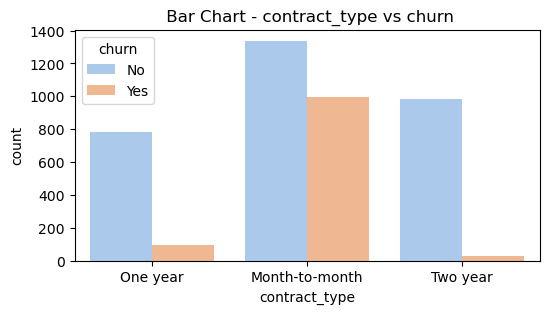

Contingency Table:
churn             No  Yes
contract_type            
Month-to-month  1338  997
One year         785   94
Two year         981   30

Chi-squared test:
Chi2 Statistic: 714.1745080997528
P-value: 8.298049251133243e-156


In [7]:
# Plot to visualize and draw conclusions from the assosociation. 

explore.analyze_contract_type(train, 'contract_type', 'churn')

> There is a relationship between contract type and whether or not someone churned

In [8]:
# Lets us know that customers with longer contracts remain loyal.
# This makes sense considering the relationship between tenure.
# they try month to month and then leave, but contract custoemrs stay
# recommend: A loyalty program to promote lenghtier contract types during sign up.

### Is there a relationship between monthly charges and whether or not a customer has churned?

 $H_0$: There is not a significant difference between monthly charges and churn.

 $H_a$: There is a significant difference between monthly charges and churn.
 
 aplha = 0.05

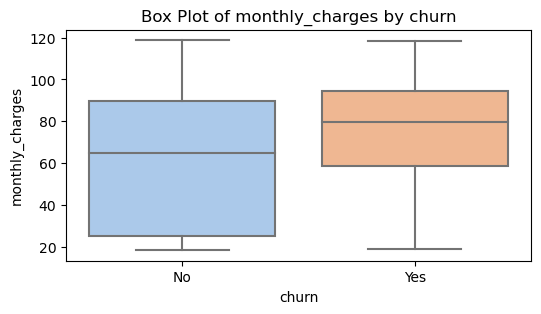

Mann-Whitney U statistic: 2136241.0
P-value: 9.83259830397179e-30


In [9]:
# Plot to visualize and draw conclusions from the assosociation. 

explore.analyze_monthly_charges(train, 'monthly_charges', 'churn')

> Reject the null hypothesis: There is a significant difference in monthly_charges between churn groups.

         - customers with higher average monthly charges churn more
             
    Recommend: Ask customers during signup if they value having lower monthly charges and suggest a longer contract if they do. 

### Is there a relationship between the number of add-ons  and whether or not a customer has churned?

$H_0$: There is not a significant difference between the number of add-ons and churn.

$H_a$: There is a significant difference between the number of add-ons and churn.
 
 aplha = 0.05

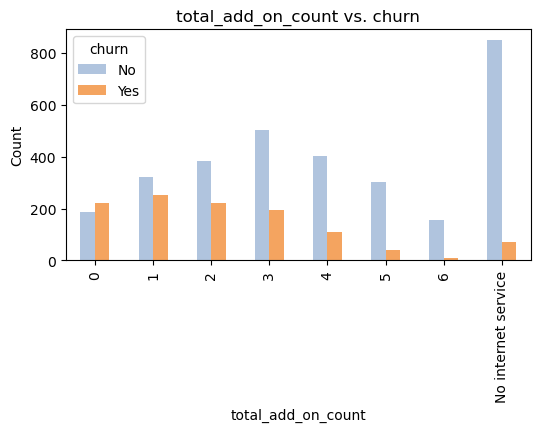

Contingency Table:
churn                 No  Yes
total_add_on_count           
0                    188  221
1                    320  251
2                    382  220
3                    504  196
4                    403  111
5                    303   41
6                    156   11
No internet service  848   70

Chi-squared test:
Chi2 Statistic: 525.9314282895757
P-value: 2.1268933468180813e-109


In [10]:
explore.analyze_total_add_on_count(train, 'total_add_on_count', 'churn')

> Reject the null hypothesis: There is a significant difference the number of add-on services and churn .

         - customers with fewer add-ons churn more.
             
    Recommend: Offer customers every add-on services to provide good customer experience. 

###  Do payment methods affect churn?

$H_0$: There is not a significant difference between the customer payment method and churn.

$H_a$: There is a significant difference between the customer payment method and churn.
 
 aplha = 0.05

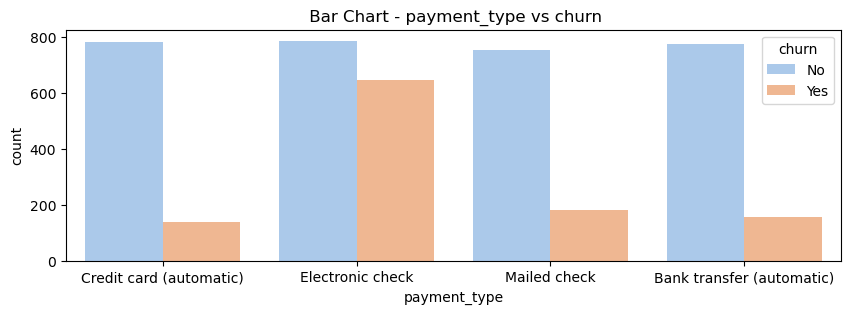

Contingency Table:
churn                       No  Yes
payment_type                       
Bank transfer (automatic)  778  157
Credit card (automatic)    783  138
Electronic check           788  646
Mailed check               755  180

Chi-squared test:
Chi2 Statistic: 386.1839951483273
P-value: 2.1760476161221612e-83


In [11]:
explore.analyze_payment_type(train, 'payment_type', 'churn')

> Reject the null hypothesis: There is a significant difference the payment type and churn .

         - customers with electronic check payment method churn more.
             
    Recommend: Offer customers a chance to signup for automatic payements with every customer interaction.

### Exploration Summary

 - The type of contract a customer has is a driver of churn
 - Tenure is a driver of churn.
 - Monthly charges are a driver of churn
 - Payment methods are drivers of churn
 

# Modeling

### Preprocess 

 - Encode values for contract_type, internet_service_type, payment_type, phone_service_type. 
 - Remove columns contract_type, internet_service_type, payment_type, phone_service_type.
 - All other columns change Yes to 1 and No to 0.
 - No internet service is now 0.
 - Convert all columns to a numerical data type.
 - Models with hyperparameters have been fit with train data and tunned with valiadate data.
 - Decsion Tree and Random Forest are pruned and tunned for best performance. 

In [12]:
# Function accepts train, evaluate, and test DataFrames and returns encoded data ready for machine learning. 
train, validate, test = prepare.preprocess_telco(train, validate, test)

### Baseline

 - Accuracy will be used as the evaluation metric
 - Accuracy = (TP + TN)/ (TP + TN + FP +FN)

In [13]:
# baseline is the target outcome mode
baseline_prediction=train.churn.mode()
baseline_accuracy = (train.churn == 0).mean()
print(f'Baseline Prediction: {baseline_prediction}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Baseline Prediction: 0    0
Name: churn, dtype: int64
Baseline Accuracy: 0.7346745562130178


 > non-churn customers makeup 73% of the data

### Separate Dataframes into features and target
 - Model will train on train dataframe features and train dataframe target.
 - Model will compare the difference between predicted and acutal target outcomes. 

In [14]:
# create two variables from train, one with only features and one for target. 
X_train = train.drop(columns=['churn'])
y_train = train.churn

# create two variables from validate, one with only features and one for target. 
X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

# create two variables from test, one with only features and one for target. 
X_test = test.drop(columns=['churn'])
y_test = test.churn

### Decsion Tree

In [15]:
# create classifier object
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=123)
#fit model on training data
clf = clf.fit(X_train, y_train)
# print result
print(f"Accuracy of Decision Tree on train data is {clf.score(X_train, y_train)}")
print(f"Accuracy of Decision Tree on validate data is {clf.score(X_validate, y_validate)}")

Accuracy of Decision Tree on train data is 0.8196449704142011
Accuracy of Decision Tree on validate data is 0.7913413768630234


> max depth of 7 with 4 leafs provides the best accuracy score for validate data which is .79

### Random Forest

In [16]:
# create classifier object
rf = RandomForestClassifier(max_depth=6, min_samples_leaf= 5,  random_state=123)
#fit model on training data
rf = rf.fit(X_train, y_train)
# print result
print(f"Accuracy of Random Forest on train data is {rf.score(X_train, y_train)}")
print(f"Accuracy of Random Forest on validate data is {rf.score(X_validate, y_validate)}")

Accuracy of Random Forest on train data is 0.8049704142011834
Accuracy of Random Forest on validate data is 0.8034066713981547


> max depth of 6 with 5 leafs provides the best accuracy score for validate data which is .80

### Logistic Regression

In [17]:
# create classifier object
logit = LogisticRegression(solver='liblinear')
#fit model on training data
logit= logit.fit(X_train, y_train)
# print result
print(f"Accuracy of Logistic Regression on train data is {logit.score(X_train, y_train)}")
print(f"Accuracy of Logistic Regression  on validate data is {logit.score(X_validate, y_validate)}")

Accuracy of Logistic Regression on train data is 0.7936094674556213
Accuracy of Logistic Regression  on validate data is 0.8055358410220014


> Logistic Regression performed better on validate. Train and validate accuracy are above baseline.

# Comparing Models

 - All models performed better than baseline on train and validate. 
 - Decision Tree and Random Forest performed slightly worse when introduced to out of sample data, this is to be expected it lets us know our model generalizes well to new data.
 - I have chosen to move forward with the Logistic Regression model becuase this model acutally performed slightly better on validate data.

### Logistic Regression with Test Data


Use Logistic Regression with test since it is the best overall model. 

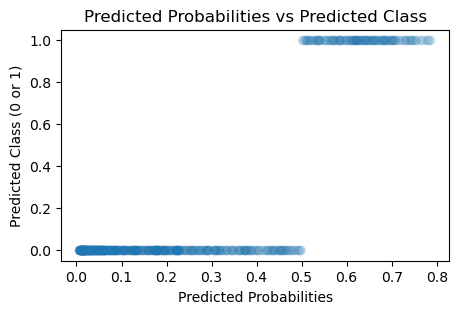

Accuracy of Logistic Regression on test is 0.8019872249822569


In [18]:
# probability and predictions for the test set
y_pred_proba = logit.predict_proba(X_test)[:, 1]
y_pred = logit.predict(X_test)
# show the 
prepare.predicted_probabilities(y_pred_proba, y_pred)
# Print accuracy score for X_test and y_test
print(f"Accuracy of Logistic Regression on test is {logit.score(X_test, y_test)}")

 - The final overall best modle performs about as well as it did on our validate data. 
 - The model performes better than baselilne and train. 
 - This model performs well with unseen data.

### Modeling Summary

 - Decsion Tree, Random Forest, and Logistics Regression model all performed better than baseline on train and validate. 
 - The Logistic Regression model performed better on validate than on train, which could mean our model is a generalized model which is one that has learned the underlying patterns in the data and can make accurate predictions on new data.
 -  A generalized model strikes a balance between capturing the complexities in the data and not being overly complex to the point of overfitting.

# Conclusions

### Exploration

 - Just over a quarter of customers have churned.
 - New customers are more likely to churn. Many new customers churn before or at 12 month of service. 
 - Shorter contracts are associated with churn, which corresponds with our understanding of the relationship between churn and tenure.
 - Montly charges correlates with churn. A customer with a high monthly bill is more likely to churn. 
 - customers using internet with less add-ons are more likely to have churned. 

### Modeling

 - The top three models w where compared 
 - New customers are more likely to churn. Many new customers churn before or at 12 month of service. 
 - Shorter contracts are associated with churn, which corresponds with our understanding of the relationship between churn and tenure.
 - Montly charges correlates with churn. A customer with a high monthly bill is more likely to churn. 
 - customers using internet with less add-ons are more likely to have churned. 

### Recommendations

 - Understand what customer needs are to ensure we are providing them with the best option. 
 - Longer contracts and higher services correlate with churn. 
 - Ensure customers are aware and offered services that best meets their needs. 

### Next Steps

 - Explore each add-on service instead of using the count. Find out which add-on services correlate with customer churn.

<div style="height: 500px;"></div>


### Appendix

 Export Logistic Regression model final test predictions to csv file:

In [19]:
'''

# Make predictions on the test set
y_prob = logit.predict_proba(X_test)[:, 1]
y_pred = logit.predict(X_test)
# Create a DataFrame with the results
results_df = pd.DataFrame({'Probability_of_Churn': y_prob, 'Churn_Predicted': y_pred}, index=X_test.index)
# Print the DataFrame
print(results_df)
# read to csv
results_df.to_csv('churn_predictions_with_id.csv')

'''


"\n\n# Make predictions on the test set\ny_prob = logit.predict_proba(X_test)[:, 1]\ny_pred = logit.predict(X_test)\n# Create a DataFrame with the results\nresults_df = pd.DataFrame({'Probability_of_Churn': y_prob, 'Churn_Predicted': y_pred}, index=X_test.index)\n# Print the DataFrame\nprint(results_df)\n# read to csv\nresults_df.to_csv('churn_predictions_with_id.csv')\n\n"